# Analyzing the epidemiological outbreak of COVID-19

This project is forked from and inspired by RMOTR's Data Science project on COVID-19. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import chart_studio.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.io as pio
print(pio.renderers)
#make plotly work with jupyter notebook
po.init_notebook_mode(connected=True) 

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']



## Reading data

The COVID-19 data is loaded from the github page [2019-Novel Coronavirus Data Repository](https://github.com/CSSEGISandData/COVID-19) by John Hopkins University Center for Systems Science and Engineering. It is also supported by the ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

The data is collated from multiple sources over the world and is updated daily. As a result, we can get up to date information by reloading the data everyday.

The data we are interested in is - COVID-19_confirmed_global, COVID_19_deaths_global, COVID_19_recovered_global.

Let's load the data and look at some of its columns.

In [2]:
#raw.githubusercontent.com returns the raw content of the file stored in github. This can be found by clicking the RAW button on the github page
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)
print(covid_confirmed.shape)
display(covid_confirmed.head(10))

(254, 73)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,3,3,3,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,158,266,301,387,387,502,589,690,745,820
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,160,194,235,249,265,290,329,407,424,482
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,9,19,32,39,39,53,62,71,77,78
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,436,669,669,818,1029,1219,1405,1617,1791,2032


In [3]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths  = pd.read_csv(COVID_DEATHS_URL)
print(covid_deaths.shape)
display(covid_deaths.head(10))

(254, 73)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,4,4,4,6,8,9,13,18,19,23
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,3,3
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,6,6,6,7,7,7,7,8,8,8


In [4]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)
print(covid_recovered.shape)
display(covid_recovered.head(10))

(240, 73)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,10,17,17,31,31,33,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,65,65,24,65,29,29,31,31,37
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3,3,3,52,52,63,72,72,72,228
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1,2,2,14,16,18,28,30,30,30
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,0,1,1,2,2,2
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


The dataframes contain info about confirmed cases of COVID-19 as well as deaths and recovered cases in various regions of the world.

## Exploratory Data Analysis

Lets check for missing values in the dataframes.

In [5]:
covid_confirmed.isna().sum()[covid_confirmed.isna().sum() != 0]

Province/State    175
dtype: int64

In [6]:
covid_deaths.isna().sum()[covid_deaths.isna().sum() != 0]

Province/State    175
dtype: int64

In [7]:
covid_recovered.isna().sum()[covid_recovered.isna().sum() != 0]

Province/State    176
dtype: int64

About 74% of the Province/State columns have missing values. The column could be ignored but it contains important stae/province information of some countries, especially China. Instead we will replace the NaN with an empty value.

In [8]:
covid_confirmed.fillna(value='', inplace=True)
covid_deaths.fillna(value='', inplace=True)
covid_recovered.fillna(value='', inplace=True)

In [9]:
#check to make sure no NaN values
print(covid_confirmed.isna().sum().sum())
print(covid_deaths.isna().sum().sum())
print(covid_recovered.isna().sum().sum())

0
0
0


#### Total number of cases over the world
Lets check the total number of COVID-19 cases in the world as of yesterday. This data is stored in the last column of the dataframes.

In [10]:
world_confirmed = covid_confirmed.iloc[:,(covid_confirmed.shape[1]-1)].sum()
world_deaths = covid_deaths.iloc[:, (covid_deaths.shape[1]-1)].sum()
world_recovered = covid_recovered.iloc[:,(covid_recovered.shape[1]-1)].sum()

In [11]:
print('Total number of confirmed cases of COVID-19 in the world as of {}: {}' .format(covid_confirmed.columns[-1],world_confirmed))
print('Total number of deaths due to COVID-19 as of {}: {}' .format(covid_deaths.columns[-1],world_deaths))
print('Total number recovered as of {}: {}' .format(covid_recovered.columns[-1],world_recovered))

Total number of confirmed cases of COVID-19 in the world as of 3/30/20: 782365
Total number of deaths due to COVID-19 as of 3/30/20: 37582
Total number recovered as of 3/30/20: 164566


Based on the above data we can calculate the active cases -
$$ active = confirmed - deaths - recovered $$
        

In [12]:
world_active = world_confirmed - world_deaths - world_recovered
world_active

580217

Lets save the world data in a dataframe and plot it using plotly's treemap.

In [13]:
world_cases = {
    'Confirmed': world_confirmed,
    'Deaths': world_deaths,
    'Recovered': world_recovered,
    'Active': world_active
}
world_cases = pd.DataFrame([world_cases])
world_cases

,Confirmed,Deaths,Recovered,Active
0,782365,37582,164566,580217


In [14]:
world_cases = world_cases.melt(value_vars=['Active', 'Deaths', 'Recovered'], value_name='count', var_name='status')
world_cases['path0'] = 'Confirmed' #in order to have a single root node or path for the treemap
world_cases

,status,count,path0
0,Active,580217,Confirmed
1,Deaths,37582,Confirmed
2,Recovered,164566,Confirmed


In [19]:
fig = px.treemap(world_cases, path=['path0', 'status'], values='count', template='plotly_dark' )
#po.iplot(fig)

fig.show()

We can see that the majority (over 74%) of the cases are still active. 

#### Time versus total cases

Lets plot the growth of COVID-19 with time over the world. 

In [16]:
#calculate total cases for each column 
covid_confirmed_time = covid_confirmed.iloc[:, 4:].sum()
covid_time = pd.DataFrame(covid_confirmed_time).reset_index()
covid_time = covid_time.rename(columns= {'index': 'date', 0: 'confirmed'})

deaths_total = covid_deaths.iloc[:, 4:].sum()
recovered_total = covid_recovered.iloc[:, 4:].sum()

covid_time['deaths'] = deaths_total.values
covid_time['recovered']  = recovered_total.values

#also calculate the active cases using the previous equation
covid_time['active'] = covid_time['confirmed'] - covid_time['deaths'] - covid_time['recovered']

display(covid_time)
#covid_time = covid_time.melt(id_vars = 'date', value_vars = ['active', 'deaths', 'recovered', 'confirmed'], var_name='status', value_name='count' )

#covid_time

,date,confirmed,deaths,recovered,active
0,1/22/20,555,17,28,510
1,1/23/20,654,18,30,606
2,1/24/20,941,26,36,879
3,1/25/20,1434,42,39,1353
4,1/26/20,2118,56,52,2010
...,...,...,...,...,...
64,3/26/20,529591,23970,122150,383471
65,3/27/20,593291,27198,130915,435178
66,3/28/20,660706,30652,139415,490639
67,3/29/20,720117,33925,149082,537110


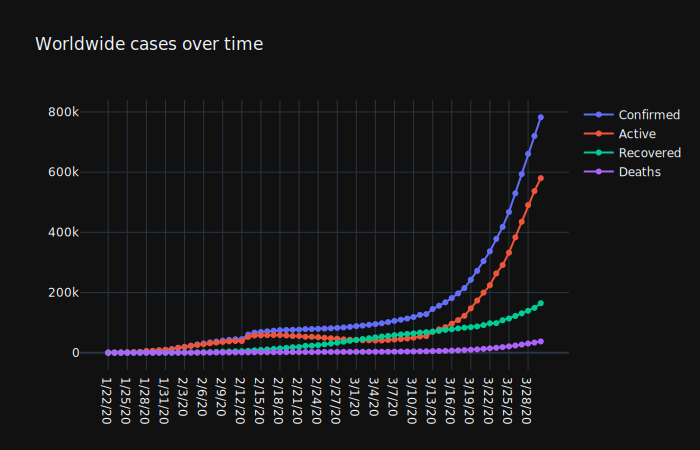

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['confirmed'], mode = 'lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['active'], mode = 'lines+markers', name='Active'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['recovered'], mode = 'lines+markers', name='Recovered'))
fig.add_trace(go.Scatter(x = covid_time['date'], y = covid_time['deaths'], mode = 'lines+markers', name='Deaths'))
fig.update_layout(template = 'plotly_dark', title = 'Worldwide cases over time')
fig.show(renderer = 'svg')